In [99]:
import cv2
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix as cm, classification_report as cr

# MNIST MODEL

In [65]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Downloaded MNIST Datset

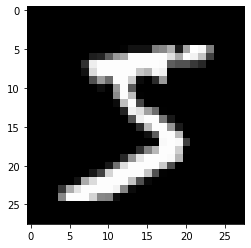

5


In [3]:
plt.imshow(X_train[0], cmap="gray")
plt.show()
print (y_train[0])

First two lines print the image. The last line shows the corresponding label.

In [4]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

Reshaped data from (60000,28,28) to (60000,28,28,1) to be able to use in our model.

In [5]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Converted labels to categorical format so that our model can predict these values categorically instead of continuously.

In [6]:
## Declare the model
model = Sequential()

## Declare the layers
layer_1 = Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1))
layer_2 = Conv2D(64, kernel_size=3, activation='relu')
layer_3 = Flatten()
layer_4 = Dense(10, activation='softmax')

## Add the layers to the model
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)

Created the model with 4 layers. The first layer is a simple convolution layer that takes in inputs of shape (28,28,1) with the "1" indicating a greyscale image.

The flatten layer allows us to link the convolution layer to the dense layer to obtain an output

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

We have compiled the model using adam optimizer, as it is shown to be highly effective for categorical data. We will try to measure accuracy as a metric over the model's training stage.

In [8]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 195s 104ms/step - loss: 0.4221 - accuracy: 0.9542 - val_loss: 0.0920 - val_accuracy: 0.9734
Epoch 2/3
1875/1875 [==============================] - 189s 101ms/step - loss: 0.0644 - accuracy: 0.9805 - val_loss: 0.0959 - val_accuracy: 0.9738
Epoch 3/3
1875/1875 [==============================] - 183s 97ms/step - loss: 0.0447 - accuracy: 0.9862 - val_loss: 0.1019 - val_accuracy: 0.9745


The accuracy went up from 95% to to 98.7% after 3 epochs. So we can stop training here to avoid overfitting.

In [9]:
model.save("digit")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: digit/assets




Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


--------- Prediction --------- 




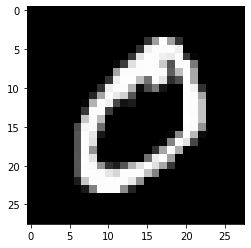



Final Output: 0


In [12]:
example = X_train[1]
prediction = model.predict(example.reshape(1, 28, 28, 1))

hard_maxed_prediction = np.zeros(prediction.shape)
hard_maxed_prediction[0][np.argmax(prediction)] = 1
print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))

print ("\n\n--------- Prediction --------- \n\n")
plt.imshow(example.reshape(28, 28), cmap="gray")
plt.show()
print("\n\nFinal Output: {}".format(np.argmax(prediction)))

As we can see, our prediction matched the number in the image, so our model is trained fairly well.

# Model 2

In [82]:
x = []
y = []

In [84]:
for dir1 in os.listdir('dataset2'):
    if dir1!=".DS_Store":
        for file in os.listdir(os.path.join('dataset2', dir1)):
            image_path= os.path.join('dataset2', dir1,  file)
            image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
            img = 255 - image[:, :, 3]
            x.append(img)
            y.append(int(dir1))


In [32]:
from sklearn.model_selection import train_test_split

In [86]:
x = np.array(x)
y = np.array(y)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15, random_state=101)

In [87]:
xtrain = xtrain.reshape(91570,28,28,1)
xtest = xtest.reshape(16160,28,28,1)
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [88]:
## Declare the model
model2 = Sequential()

## Declare the layers
layer_1 = Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28,1))
layer_2 = Conv2D(64, kernel_size=3, activation='relu')
layer_3 = Flatten()
layer_4 = Dense(10, activation='softmax')

## Add the layers to the model
model2.add(layer_1)
model2.add(layer_2)
model2.add(layer_3)
model2.add(layer_4)

In [89]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [90]:
model2.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=3)

Epoch 1/3
2862/2862 [==============================] - 278s 97ms/step - loss: 1.1832 - accuracy: 0.9707 - val_loss: 0.0415 - val_accuracy: 0.9898
Epoch 2/3
2862/2862 [==============================] - 253s 88ms/step - loss: 0.0270 - accuracy: 0.9953 - val_loss: 0.0379 - val_accuracy: 0.9955
Epoch 3/3
2862/2862 [==============================] - 228s 80ms/step - loss: 0.0214 - accuracy: 0.9968 - val_loss: 0.0261 - val_accuracy: 0.9973


In [91]:
model2.save("digit2")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: digit2/assets


# Model 3

This model is trained on numbers that are encircled.

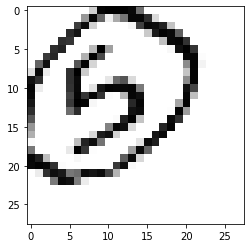

In [102]:
x = []
y = []
image = cv2.imread('circle_dataset/datadown/5/20250.png', cv2.IMREAD_UNCHANGED)
img = 255 - image[:, :, 3]
plt.imshow(image)

In [105]:
for dir1 in os.listdir('circle_dataset/datadown'):
        for file in os.listdir(os.path.join('circle_dataset/datadown', dir1)):
            image_path= os.path.join('circle_dataset/datadown', dir1,  file)
            image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
            img = 255 - image[:, :, 3]
            x.append(img)
            y.append(int(dir1))

In [106]:
x = np.array(x)
y = np.array(y)

In [107]:
x.shape

(87480, 28, 28)

In [108]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15, random_state=101)
print(xtrain.shape, xtest.shape)

(74358, 28, 28) (13122, 28, 28)


In [109]:
ytrain_org = ytrain
ytest_org = ytest

In [110]:
xtrain = xtrain.reshape(74358,28,28,1)
xtest = xtest.reshape(13122,28,28,1)
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [94]:
## Declare the model
model3 = Sequential()

## Declare the layers
layer_1 = Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28,1))
layer_2 = Conv2D(16, kernel_size=3, activation='relu')
layer_3 = Conv2D(12, kernel_size=3, activation ='relu')
layer_4 = Flatten()
layer_5 = Dense(10, activation='softmax')

## Add the layers to the model
model3.add(layer_1)
model3.add(layer_2)
model3.add(Dropout(0.2))
model3.add(layer_3)
model3.add(Dropout(0.2))
model3.add(layer_4)
model3.add(layer_5)

In [95]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [96]:
model3.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=2)

Epoch 1/2
2324/2324 [==============================] - 246s 106ms/step - loss: 0.5307 - accuracy: 0.8913 - val_loss: 0.0041 - val_accuracy: 0.9989
Epoch 2/2
2324/2324 [==============================] - 246s 106ms/step - loss: 0.0244 - accuracy: 0.9930 - val_loss: 0.0032 - val_accuracy: 0.9989


In [97]:
model3.save("digit3")

INFO:tensorflow:Assets written to: digit3/assets


In [111]:
pred = np.argmax(model3.predict(xtest), axis=1)

In [115]:
print(cr(ytest_org, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1342
           1       1.00      1.00      1.00      1322
           2       1.00      1.00      1.00      1251
           3       1.00      0.99      1.00      1320
           4       1.00      1.00      1.00      1271
           5       1.00      1.00      1.00      1387
           6       1.00      1.00      1.00      1271
           7       1.00      1.00      1.00      1310
           8       1.00      1.00      1.00      1347
           9       0.99      1.00      1.00      1301

    accuracy                           1.00     13122
   macro avg       1.00      1.00      1.00     13122
weighted avg       1.00      1.00      1.00     13122



In [117]:
print(cm(ytest_org, pred))

[[1342    0    0    0    0    0    0    0    0    0]
 [   0 1322    0    0    0    0    0    0    0    0]
 [   0    0 1251    0    0    0    0    0    0    0]
 [   0    0    1 1308    0    1    0    2    0    8]
 [   0    0    0    0 1269    0    0    0    0    2]
 [   0    0    0    0    0 1387    0    0    0    0]
 [   0    0    0    0    0    0 1271    0    0    0]
 [   0    0    0    0    0    0    0 1310    0    0]
 [   0    0    0    0    0    0    0    0 1347    0]
 [   0    0    0    0    0    0    0    0    0 1301]]
